In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('churn.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.drop(columns = ['RowNumber' , 'CustomerId' , 'Surname'] , inplace= True)

In [12]:
df = pd.get_dummies(df , columns = ['Geography' , 'Gender'] , drop_first = True)

In [14]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [15]:
df.shape

(10000, 12)

In [18]:
x = df.drop(columns = ['Exited'])
y = df['Exited']

In [19]:
x.shape , y.shape

((10000, 11), (10000,))

In [21]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 10)

x_train.shape,x_test.shape

((8000, 11), (2000, 11))

In [22]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

In [24]:
x_train_scaled

array([[ 1.78974378,  0.94394225,  1.04271518, ...,  1.73436329,
        -0.57388614,  0.91255717],
       [ 0.26040483,  2.35932486, -0.35053238, ..., -0.57658047,
         1.74250594, -1.09582175],
       [-0.22526362, -0.47144036,  0.3460914 , ..., -0.57658047,
         1.74250594,  0.91255717],
       ...,
       [-1.97160337,  0.09471269,  0.3460914 , ...,  1.73436329,
        -0.57388614, -1.09582175],
       [ 0.60140608, -0.47144036, -1.04715616, ..., -0.57658047,
        -0.57388614, -1.09582175],
       [ 0.21907135,  0.09471269,  1.73933896, ...,  1.73436329,
        -0.57388614,  0.91255717]])

In [28]:
from tensorflow import keras
from keras.layers import Dense
from keras import Sequential

In [39]:
model = Sequential()

model.add(Dense(10 , activation = 'sigmoid' , input_dim =11))
model.add(Dense(20 , activation = 'relu'))
model.add(Dense(10 , activation = 'relu'))
model.add(Dense(1 , activation = 'sigmoid'))

In [40]:
model.compile(loss = 'binary_crossentropy' , optimizer = 'Adam' , metrics = ['accuracy'])

In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                120       
                                                                 
 dense_9 (Dense)             (None, 20)                220       
                                                                 
 dense_10 (Dense)            (None, 10)                210       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 561 (2.19 KB)
Trainable params: 561 (2.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
history = model.fit(x_train_scaled , y_train , epochs = 40 , validation_split = 0.2)

Epoch 1/40
200/200 [==============================] - 1s 2ms/step - loss: 0.5269 - accuracy: 0.7517 - val_loss: 0.4455 - val_accuracy: 0.8112
Epoch 2/40
200/200 [==============================] - 0s 1ms/step - loss: 0.4436 - accuracy: 0.7992 - val_loss: 0.4111 - val_accuracy: 0.8225
Epoch 3/40
200/200 [==============================] - 0s 1ms/step - loss: 0.4159 - accuracy: 0.8136 - val_loss: 0.3954 - val_accuracy: 0.8213
Epoch 4/40
200/200 [==============================] - 0s 1ms/step - loss: 0.3975 - accuracy: 0.8253 - val_loss: 0.3814 - val_accuracy: 0.8288
Epoch 5/40
200/200 [==============================] - 0s 1ms/step - loss: 0.3802 - accuracy: 0.8378 - val_loss: 0.3686 - val_accuracy: 0.8431
Epoch 6/40
200/200 [==============================] - 0s 1ms/step - loss: 0.3652 - accuracy: 0.8466 - val_loss: 0.3548 - val_accuracy: 0.8500
Epoch 7/40
200/200 [==============================] - 0s 1ms/step - loss: 0.3541 - accuracy: 0.8514 - val_loss: 0.3491 - val_accuracy: 0.8531
Epoch 

In [48]:
history.history

{'loss': [0.5269344449043274,
  0.4436309337615967,
  0.41593343019485474,
  0.39752206206321716,
  0.3802255690097809,
  0.36518895626068115,
  0.3540935218334198,
  0.3441821038722992,
  0.34059062600135803,
  0.3368908762931824,
  0.33515360951423645,
  0.3340536057949066,
  0.3329119086265564,
  0.332123339176178,
  0.33081963658332825,
  0.33114829659461975,
  0.3294447660446167,
  0.3293895423412323,
  0.32820919156074524,
  0.329497754573822,
  0.3283466100692749,
  0.32774898409843445,
  0.32681646943092346,
  0.32684624195098877,
  0.32633450627326965,
  0.3264603912830353,
  0.3253195285797119,
  0.32600438594818115,
  0.3255738317966461,
  0.324992835521698,
  0.32458555698394775,
  0.32423534989356995,
  0.32560181617736816,
  0.324491411447525,
  0.3247619867324829,
  0.3239893615245819,
  0.3230247497558594,
  0.3236039876937866,
  0.3232548236846924,
  0.32237815856933594],
 'accuracy': [0.7517187595367432,
  0.7992187738418579,
  0.8135937452316284,
  0.8253124952316284

In [42]:
y_pred = model.predict(x_test_scaled)
y_pred = np.where(y_pred>0.5 , 1 , 0)

63/63 [==============================] - 0s 756us/step


In [43]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(y_test , y_pred)

0.8525

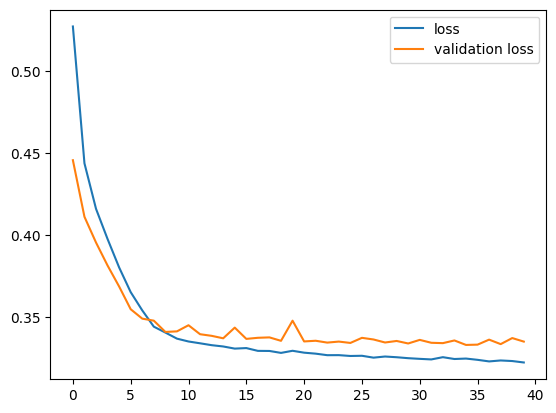

In [46]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'] , label = 'loss')
plt.plot(history.history['val_loss'] , label = 'validation loss')
plt.legend()

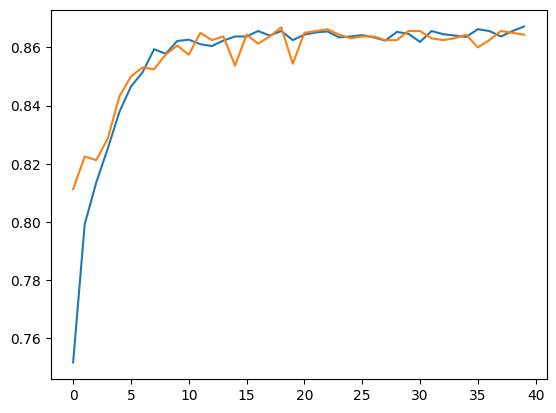

In [47]:
plt.plot(history.history['accuracy'] , label = 'accuracy')
plt.plot(history.history['val_accuracy'] , label = 'validation accuracy')